---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 2

---

Please write your full name here
- **Name** : Habiba Mohsen Ateya


## Part 1 Simulated Data

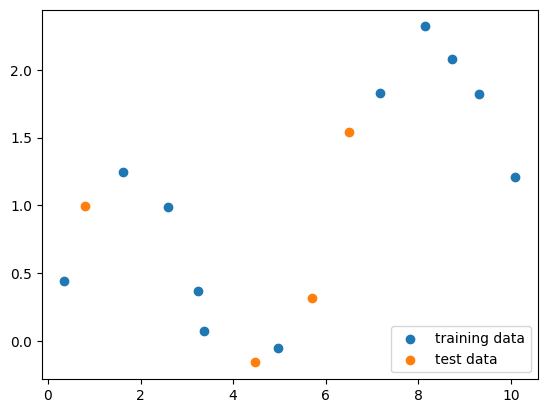

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
- Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees **1, 2, 3, 6, and 9**. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model)
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array.
- The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 2, the third row degree 3, the fourth row degree 6, and the fifth row degree 9.

In [ ]:
def answer_one():
      from sklearn.linear_model import LinearRegression
      from sklearn.preprocessing import PolynomialFeatures

      X_train_reshaped = X_train.reshape(-1, 1)


      result = np.zeros((5, 100))


      x_values = np.linspace(0, 10, 100).reshape(-1, 1)

      for i, degree in enumerate([1, 2, 3, 6, 9]):
          poly = PolynomialFeatures(degree=degree)
          X_poly = poly.fit_transform(X_train_reshaped)
          x_values_poly = poly.transform(x_values)

          model = LinearRegression().fit(X_poly, y_train)
          result[i, :] = model.predict(x_values_poly)

      return result

In [ ]:
results = answer_one()
print(results.shape)

(5, 100)


In [ ]:
print(results)

[[ 2.53040195e-01  2.69201547e-01  2.85362899e-01  3.01524251e-01
   3.17685603e-01  3.33846955e-01  3.50008306e-01  3.66169658e-01
   3.82331010e-01  3.98492362e-01  4.14653714e-01  4.30815066e-01
   4.46976417e-01  4.63137769e-01  4.79299121e-01  4.95460473e-01
   5.11621825e-01  5.27783177e-01  5.43944529e-01  5.60105880e-01
   5.76267232e-01  5.92428584e-01  6.08589936e-01  6.24751288e-01
   6.40912640e-01  6.57073992e-01  6.73235343e-01  6.89396695e-01
   7.05558047e-01  7.21719399e-01  7.37880751e-01  7.54042103e-01
   7.70203454e-01  7.86364806e-01  8.02526158e-01  8.18687510e-01
   8.34848862e-01  8.51010214e-01  8.67171566e-01  8.83332917e-01
   8.99494269e-01  9.15655621e-01  9.31816973e-01  9.47978325e-01
   9.64139677e-01  9.80301028e-01  9.96462380e-01  1.01262373e+00
   1.02878508e+00  1.04494644e+00  1.06110779e+00  1.07726914e+00
   1.09343049e+00  1.10959184e+00  1.12575320e+00  1.14191455e+00
   1.15807590e+00  1.17423725e+00  1.19039860e+00  1.20655995e+00
   1.22272

### Fitted model plot

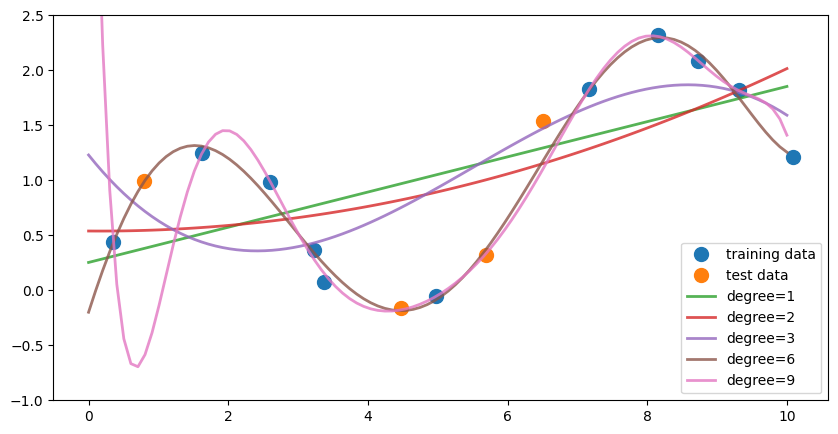

In [ ]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines in terms of fitting the data.

**ANSWER**

the higher-degree models show better fitting to the training data, but they may suffer from overfitting, as evidenced by poorer performance on the test data, especially very higher degrees.

### Question 2
- Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the **training data** as well as the the **test data**, and return both of these arrays in a tuple.

- *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    degrees = np.arange(10)
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
        X_poly_test = poly.transform(X_test.reshape(-1, 1))

        model = LinearRegression().fit(X_poly_train, y_train)

        # Compute R^2 scores for training and test sets
        r2_train[degree] = r2_score(y_train, model.predict(X_poly_train))
        r2_test[degree] = r2_score(y_test, model.predict(X_poly_test))

    return (r2_train, r2_test)

In [ ]:
results = answer_two()
print(results[0].shape,results[1].shape)

(10,) (10,)


In [ ]:
print(results)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525365]))


### Question 3
- Plot $R^2$ scores at degrees from 0 to 9 for both training and testing data on the same plot.

- The plot must contain a legend and appropriate names for the axes.

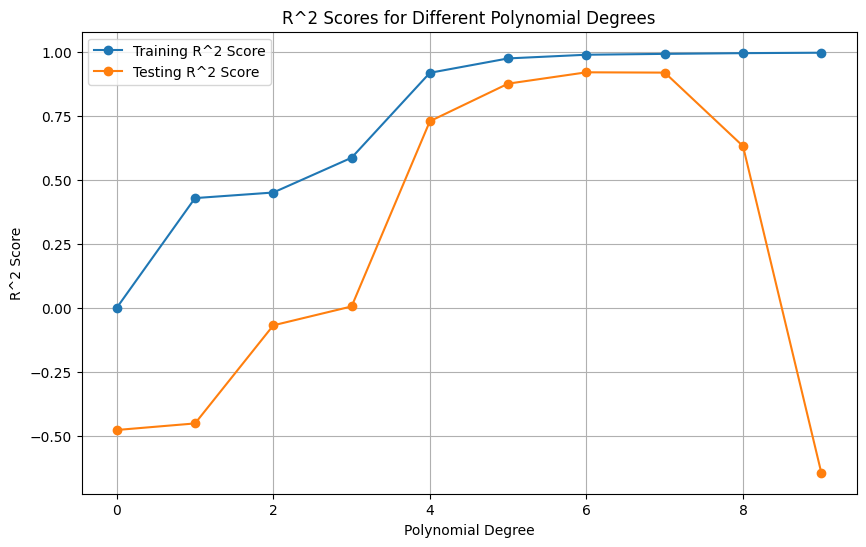

In [ ]:
import matplotlib.pyplot as plt
def plot_r2_scores():
    degrees = np.arange(10)
    r2_train,r2_test=answer_two()

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, r2_train, label='Training R^2 Score', marker='o')
    plt.plot(degrees, r2_test, label='Testing R^2 Score', marker='o')

    plt.title('R^2 Scores for Different Polynomial Degrees')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R^2 Score')
    plt.legend()
    plt.grid(True)

    plt.show()
plot_r2_scores()

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is **underfitting**? What degree level corresponds to a model that is **overfitting**? What choice of degree level would provide a model with **good generalization** performance on this dataset?

**ANSWER**

1. **Underfitting:**
  Degree 0,1,2 and 3 models are underfitting, as indicated by low R^2 scores on both the training and testing sets.
2. **Overfitting:**
  Degrees 8 and 9 may correspond to overfitting, as they show high R^2 scores on the training set but lower scores on the test set.
3. **Good Generalization:**
  Degrees 6 and 7 have reasonably high R^2 scores on both the training and test sets. These degrees possibly provide a model with good generalization performance.


### Question 4

- Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

- For this question, train three models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`), and a regularized Ridge Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 50.
- Return the $R^2$ score for both the LinearRegression, Lasso, Ridge model's test sets.


*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)`*

In [ ]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, Ridge, LinearRegression
    from sklearn.metrics import r2_score

    poly = PolynomialFeatures(degree=50)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.transform(X_test.reshape(-1, 1))

    lr_model = LinearRegression().fit(X_poly_train, y_train)
    LinearRegression_R2_test_score = r2_score(y_test, lr_model.predict(X_poly_test))

    lasso_model = Lasso(alpha=0.01, max_iter=10000).fit(X_poly_train, y_train)
    Lasso_R2_test_score = r2_score(y_test, lasso_model.predict(X_poly_test))


    ridge_model = Ridge(alpha=0.01, max_iter=10000).fit(X_poly_train, y_train)
    Ridge_R2_test_score = r2_score(y_test, ridge_model.predict(X_poly_test))

    return (LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)


In [ ]:
results = answer_four()
print(results)

(0.006953559711665225, 0.8493908995296351, -0.08938086200465722)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**Comment on the results**
- which is better?
- what's the difference between the models in results and data fit?
- how do the weight values differ between the models?

**ANSWER**

* **Better performance :** Among the three models, Lasso Regression has the highest R^2 score on the test set (0.85), indicating better performance.

*   **Differences in Results:**
 * Linear Regression has a low R^2 score, suggesting poor performance.
 * Lasso Regression outperforms both Linear and Ridge Regression, indicating that the regularization term in Lasso helps prevent overfitting and improves generalization.
 * Ridge Regression has a negative R^2 score, indicating that it might not be well-suited for this dataset.
* **Data Fit:**
 * Linear Regression tries to fit the data without any regularization, leading to overfitting, especially with a high-degree polynomial.
 * Lasso Regression, with its L1 regularization, tends to produce sparse models by driving some coefficients to exactly zero. This can be useful for feature selection and preventing overfitting.
 * Ridge Regression, with its L2 regularization, penalizes large coefficients but typically does not lead to coeficients becoming zero.
* **Weight Values:**
 * The weight values in Linear Regression will be non-zero for all features, and their magnitudes may be quite large.
 * Lasso Regression tends to produce sparse weight vectors, it sets some coefficients to exactly zero, effectively performing feature selection.
 * Ridge Regression penalizes large coefficients but does not lead to some coeffiecients becoming zeros so all features remain in the model.




### Question 5
Write a function to calculate the total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ]
$$

**Then compare your results with scikit-learn implementation of mean square error on the example provided below:**

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [ ]:
def mse(y_true, y_pred):
     import numpy as np
     y_true = np.array(y_true)
     y_pred = np.array(y_pred)

     error = np.mean((y_true - y_pred)**2)

     return error

In [ ]:
from sklearn.metrics import mean_squared_error
sklearn_mse_result = mean_squared_error(y_true, y_pred)

print("Custom MSE Result:", mse(y_true, y_pred))
print("Scikit-Learn MSE Result:", sklearn_mse_result)

Custom MSE Result: 0.375
Scikit-Learn MSE Result: 0.375


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k
        $$
    * Then for $b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)}
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [ ]:
import numpy as np

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :

          self.learning_rate = learning_rate
          self.iterations = iterations
          self.type = type
          self.lam = reg_parameter

    def fit( self, X, Y ) :
        if X.ndim == 1:
          X = X.reshape(-1, 1)

        self.m, self.n = X.shape

        self.W = np.random.rand(self.n)

        self.b = 0

        self.X = X
        self.Y = Y

          # gradient descent learning

        for i in range( self.iterations ) :

              self.update_weights()

        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)

        # Calculate gradients
        if self.type == 'linear':
            dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
            db = -2 * np.sum(self.Y - Y_pred) / self.m
        elif self.type == 'ridge':
            dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m + 2 * self.lam * self.W / self.m
            db = -2 * np.sum(self.Y - Y_pred) / self.m
        else:  # Lasso
            dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m + self.lam * np.sign(self.W) / self.m
            db = -2 * np.sum(self.Y - Y_pred) / self.m


        # update weights
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
       if X.ndim == 1:
          X = X.reshape(-1, 1)
       y_pred = np.dot(X, self.W) + self.b
       return y_pred

- **Train your 3 models on the simulated train data provided at the beginning of the assignment**
- use alpha = 0.01, learning_rate = 0.01, iterations, 500

In [ ]:
# Training parameters
alpha = 0.01
learning_rate = 0.01
iterations = 500

linear_model = LinearRegression(learning_rate,500)
linear_model.fit(X_train, y_train)

    # Train Ridge Regression
ridge_model = LinearRegression(learning_rate,500,'ridge',alpha)
ridge_model.fit(X_train, y_train)

    # Train Lasso Regression
lasso_model = LinearRegression(learning_rate,500,'lasso',alpha)
lasso_model.fit(X_train, y_train)

    # Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

- **Test your 3 models on the simulated test data provided at the beginning of the assignment**
- **Print the MSE for each model**

In [ ]:
from sklearn.metrics import mean_squared_error
linear_model_mse = mean_squared_error(y_test, y_pred_linear)
ridge_model_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_model_mse = mean_squared_error(y_test,y_pred_lasso)

print(f"Linear Regression MSE: {linear_model_mse:.4f}")
print(f"Ridge Regression MSE: {ridge_model_mse:.4f}")
print(f"Lasso Regression MSE: {lasso_model_mse:.4f}")

Linear Regression MSE: 0.6067
Ridge Regression MSE: 0.6067
Lasso Regression MSE: 0.6066


---
# Part 2 - Diabetes Data

For this assignment, you will be using the [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset to create a regression model that can help diagnose patients' disease progression one year after baseline.


## Question 1 (1 point)

Load Diabetes Dataset from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn-datasets-load-diabetes)

The following function MUST:
1. Load diabetes dataset from scikit-learn as a scikit-learn bunch object which is similar to a dictionary
    - Use `scaled= False`
2. Convert the diabetes data to a pandas dataframe
3. Return a pandas dataframe with:
    - **CORRECT COLUMN NAMES** --> meaningful !!! i.e. NOT s1, s2, s3, ...
    - target column should be named "target"

In [ ]:
def load_data(scaled=False):
    """
    Return a pandas dataframe
    """
    import pandas as pd
    from sklearn.datasets import load_diabetes
    from sklearn.preprocessing import StandardScaler

    diabetes_data=load_diabetes()
    corrected_feature_names = [
          'Age', 'Gender', 'Body mass index', 'Average blood pressure',
          'Total serum cholesterol', 'Low-density lipoproteins',
          'High-density lipoproteins', 'Total cholesterol / HDL cholesterol ratio',
          'Log of serum triglycerides level', 'Blood sugar level'
      ]
    diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
    diabetes_df.columns = corrected_feature_names

    diabetes_df['target'] = diabetes_data.target
    return diabetes_df

In [ ]:
df = load_data()
df.head()

,Age,Gender,Body mass index,Average blood pressure,Total serum cholesterol,Low-density lipoproteins,High-density lipoproteins,Total cholesterol / HDL cholesterol ratio,Log of serum triglycerides level,Blood sugar level,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Question 2

### 2.1

Print a data description of all columns of dataframe

use `.describe()`

In [ ]:
def range_columns(df):
    """
    Function to return the description of the DataFrame.
    """
    return df.describe()

In [ ]:
range_columns(df)

,Age,Gender,Body mass index,Average blood pressure,Total serum cholesterol,Low-density lipoproteins,High-density lipoproteins,Total cholesterol / HDL cholesterol ratio,Log of serum triglycerides level,Blood sugar level,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### 2.2

Remove all categorical features from dataframe. Function should return the new dataframe.

In [ ]:
def drop_categorical(df):
  df_dropped = df.drop(columns=['Gender'], errors='ignore')
  return df_dropped


In [ ]:
df = drop_categorical(df)

In [ ]:
df.head()

,Age,Body mass index,Average blood pressure,Total serum cholesterol,Low-density lipoproteins,High-density lipoproteins,Total cholesterol / HDL cholesterol ratio,Log of serum triglycerides level,Blood sugar level,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Question 3

Using `train_test_split`, split `X` and `y` into training and test sets. With 80% training and 10% test.

USE `random_state=0`

In [ ]:
def split(df):
    """
    Function should return X_train, X_test, y_train, y_test
    """
    X= df.drop('target', axis=1)

    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split(df)

## Question 5

Use scikit-learn standard scaler to standardize training data into 0 mean and 1 std.

Function must return the normalized data and the standard scaler object

In [ ]:
from sklearn.preprocessing import StandardScaler
def standardize(data):
    """Standardize a data to 0 mean and 1 std
    Return standardized data AND the scaler object
    """
    scaler = StandardScaler()
    new_data = scaler.fit_transform(data)

    return new_data, scaler


In [ ]:
scaled_X_train, x_scaler = standardize(X_train)

- Apply the same transformation to the test data

In [ ]:
scaled_X_test =x_scaler.transform(X_test)
scaled_y_test , y_scaler =standardize(y_train.values.reshape(-1, 1))

## Question 6

Create a scikit-learn regression model and train it on diabetes data.
Your function should return the trained model

In [ ]:
from sklearn.linear_model import LinearRegression

def regression_sc(X, y):
    """Trains a linear regression model on X, y data"""

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the data
    model.fit(X, y)

    return model


In [ ]:
linreg = regression_sc(scaled_X_train, y_train)
y_pred = linreg.predict(scaled_X_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

linear model coeff (w): [ -2.71717598  29.19053036  11.99182524 -27.87971619  12.73600844
   3.19583359   6.43784867  36.12397921   0.98113962]
linear model intercept (b): 151.606


- Print the mse, and R2 score for the train data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = linreg.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error (Train):", mse_train)
print("R2 Score (Train):", r2_train)

Mean Squared Error (Train): 5817.141818634182
R2 Score (Train): 0.05114521023248142


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- Print the mse, and R2 score for the test data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_test = linreg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (test):", mse_test)
print("R2 Score (test):", r2_test)

Mean Squared Error (test): 4940.769381245938
R2 Score (test): 0.036497720637587494


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- Comment on the results in terms of data fit

* Training Data:
  * Mean Squared Error (Train): 5817.14

   The average squared difference between the predicted values and the actual values on the training data is 5817.14. A lower MSE is desirable, and this value suggests some level of prediction error.
   
  * R2 Score (Train): 0.0511

   The R2 score is 0.0511. This indicates that the linear regression model explains only a small fraction of the variance in the training data.
* Test Data:
  * Mean Squared Error (Test): 4940.77

   The average squared difference between the predicted values and the actual values on the test data is 4940.77. This is similar to the training MSE, suggesting consistency in prediction error between the training and test sets.

  * R2 Score (Test): 0.0365

   The R2 score for the test data is 0.0365. Similar to the training R2 score, this value is quite low, indicating that the model has limited explanatory power on the test data.